<a href="https://colab.research.google.com/github/rashidmeras/EVA-M6/blob/master/Final_Quiz_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

Using TensorFlow backend.


2019-06-12 06:33:02.754825


In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-12 06:33:02.765528


### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 1s 0us/step
2019-06-12 06:33:04.304358


(60000, 28, 28)
2019-06-12 06:33:04.338214


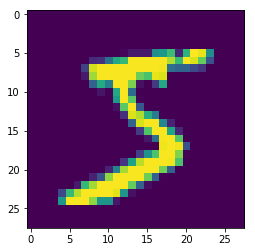

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-12 06:33:07.458753


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-12 06:33:09.092168


In [7]:
y_train[:10]
print(datetime.datetime.now())

2019-06-12 06:33:10.652828


In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-12 06:33:12.097819


In [9]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-12 06:33:13.989242


## Using Sequential

In [11]:
## MAIN BLOCK

from keras.layers import Activation
from keras.models import Model
from keras.layers import Input
from keras.layers.merge import concatenate

model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  if __name__ == '__main__':


## Using Functional and Add() 

In [12]:
## MAIN BLOCK

from keras.layers import Activation
from keras.models import Model
from keras.layers import Input
from keras.layers.merge import concatenate

# x1 = Input  
x1 = Input(shape=(28, 28, 1))

# x2 = Conv(x1)
x2 = Convolution2D(32, (3,3), activation='relu', padding='same', name='X2_Conv')(x1)

# x3 = Conv(x1 + x2)
x3i = Add()([x1, x2])
x3  = Convolution2D(32, (3,3), activation='relu', padding='same', name='X3_Conv')(x3i)

# x4 = MaxPooling(x1 + x2 + x3)
x4i = Add()([x1, x2, x3])
x4  = MaxPooling2D(pool_size=(2, 2)) (x4i)

# x5 = Conv(x4)
x5 = Convolution2D(32, (3,3), activation='relu', padding='same', name='X5_Conv')(x4)

# x6 = Conv(x4 + x5)
x6i = Add()([x4, x5])
x6  = Convolution2D(32, (3,3), activation='relu', padding='same', name='X6_Conv')(x6i)

# x7 = Conv(x4 + x5 + x6)
x7i = Add()([x4, x5, x6])
x7  = Convolution2D(32, (3,3), activation='relu', padding='same', name='X7_Conv')(x7i)

# x8 = MaxPooling(x5 + x6 + x7)
x8i = Add()([x5, x6, x7])
x8  = MaxPooling2D(pool_size=(2, 2)) (x8i)

# x9 = Conv(x8)
x9 = Convolution2D(32, (3,3), activation='relu', padding='same', name='X9_Conv')(x8)

# x10 = Conv (x8 + x9)
x10i = Add()([x8, x9])
x10  = Convolution2D(32, (3,3), activation='relu', padding='same', name='X10_Conv')(x10i)

# x11 = Conv (x8 + x9 + x10)
x11i = Add()([x8, x9, x10])
x11  = Convolution2D(32, (3,3), activation='relu', padding='same', name='X11_Conv')(x11i)

# BIG KERNEL Operation (use a large kernel size (10 units), if required at this step to be able to add softmax in the next layer)
x12 = Convolution2D(10, (7,7), name='X12_Conv')(x11)

flat_layer = Flatten()(x12)
output     = Activation('softmax')(flat_layer)

model = Model(inputs=[x1], outputs=[output])
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
X2_Conv (Conv2D)                (None, 28, 28, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
add_1 (Add)                     (None, 28, 28, 32)   0           input_1[0][0]                    
                                                                 X2_Conv[0][0]                    
__________________________________________________________________________________________________
X3_Conv (Conv2D)                (None, 28, 28, 32)   9248        add_1[0][0]                      
__________

## Using Functional and Concatenate

In [0]:
## MAIN BLOCK

from keras.layers import Activation
from keras.models import Model
from keras.layers import Input
from keras.layers.merge import concatenate
  
# x1 = Input  
x1 = Input(shape=(28, 28, 1))

# x2 = Conv(x1)
x2 = Convolution2D(32, (3,3), activation='relu', padding='same', name='X2_Conv')(x1)

# x3 = Conv(x1 + x2)
x3i = concatenate([x1, x2], axis=-1)
x3 = Convolution2D(32, (3,3), activation='relu', padding='same', name='X3_Conv')(x3i)

# x4 = MaxPooling(x1 + x2 + x3)
x4i = concatenate([x1, x2, x3], axis=-1)
x4 = MaxPooling2D(pool_size=(2, 2)) (x4i)

# x5 = Conv(x4)
x5 = Convolution2D(32, (3,3), activation='relu', padding='same', name='X5_Conv')(x4)

# x6 = Conv(x4 + x5)
x6i = concatenate([x4, x5], axis=-1)
x6 = Convolution2D(32, (3,3), activation='relu', padding='same', name='X6_Conv')(x6i)

# x7 = Conv(x4 + x5 + x6)
x7i = concatenate([x4, x5, x6], axis=-1)
x7 = Convolution2D(32, (3,3), activation='relu', padding='same', name='X7_Conv')(x7i)

# x8 = MaxPooling(x5 + x6 + x7)
x8i = concatenate([x5, x6, x7], axis=-1)
x8 = MaxPooling2D(pool_size=(2, 2)) (x8i)

# x9 = Conv(x8)
x9 = Convolution2D(32, (3,3), activation='relu', padding='same', name='X9_Conv')(x8)

# x10 = Conv (x8 + x9)
x10i = concatenate([x8, x9], axis=-1)
x10 = Convolution2D(32, (3,3), activation='relu', padding='same', name='X10_Conv')(x10i)

# x11 = Conv (x8 + x9 + x10)
x11i = concatenate([x8, x9, x10], axis=-1)
x11 = Convolution2D(32, (3,3), activation='relu', padding='same', name='X11_Conv')(x11i)

# BIG KERNEL Operation (use a large kernel size (10 units), if required at this step to be able to add softmax in the next layer)
x12 = Convolution2D(10, (7,7), name='X12_Conv')(x11)

flat_layer = Flatten()(x12)
output = Activation('softmax')(flat_layer)

model = Model(inputs=[x1], outputs=[output])


In [14]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
X2_Conv (Conv2D)                (None, 28, 28, 32)   320         input_2[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 28, 28, 33)   0           input_2[0][0]                    
                                                                 X2_Conv[0][0]                    
__________________________________________________________________________________________________
X3_Conv (Conv2D)                (None, 28, 28, 32)   9536        concatenate_1[0][0]              
__________

In [15]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-06-12 06:34:29.308789


In [16]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 20s 339us/step - loss: 0.1049 - acc: 0.9669
Epoch 2/10
60000/60000 [==============================] - 15s 250us/step - loss: 0.0376 - acc: 0.9883
Epoch 3/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.0265 - acc: 0.9915
Epoch 4/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.0219 - acc: 0.9932
Epoch 5/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.0164 - acc: 0.9948
Epoch 6/10
60000/60000 [==============================] - 15s 247us/step - loss: 0.0124 - acc: 0.9964
Epoch 7/10
60000/60000 [==============================] - 15s 246us/step - loss: 0.0124 - acc: 0.9960
Epoch 8/10
60000/60000 [==============================] - 15s 245us/step - loss: 0.0096 - acc: 0.9968
Epoch 9/10
60000/60000 [==============================] - 15s 248us/step - loss: 0.0097 - acc: 0.9970
Epoch 10/10
60000/60000 [==============================] - 15s 252us/step - loss: 

In [17]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-12 06:37:16.527359


In [18]:
print(score)
print(datetime.datetime.now())

[0.029596074548431807, 0.9918]
2019-06-12 06:37:19.677694
